# Naman Lahoti: TASK-2 : PREDICTION USING UNSUPERVISED ML
OBJECTIVE : PREDICT THE OPTIMUM NUMBER OF CLUSTERS IN THE IRIS DATASET AND REPRESENT IT VISUALLY


In [1]:
#importing libraries
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Reading the data from csv file
data = pd.read_csv('Iris.csv')

In [3]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.shape


(150, 6)

In [7]:
#Finding the optimum number of clusters for K-Means Classification

x = data.iloc[:,[0,1,2,3]].values
sse=[]
k_rng = range(1,10)
for k in k_rng:
    km =KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

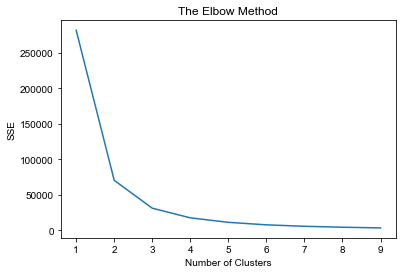

In [8]:
#Plotting the above results onto a line graph to observe the 'elbow'
plt.plot(k_rng, sse)
plt.title('The Elbow Method')
sns.set_style('darkgrid')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

With the help of Elbow Method, we can observe that the optimum number of clusters = 3 in this case.

In [9]:
#Applying K Means to the dataset using optimum number of clusters.
km =KMeans(n_clusters = 3)
prdcted=km.fit_predict(x)

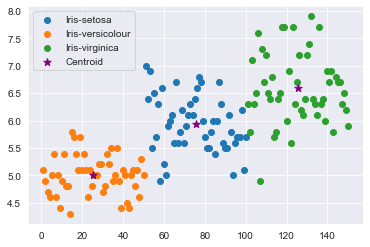

In [10]:
# Visualizing the clusters
plt.scatter(x[prdcted == 0,0 ],x[prdcted == 0,1 ], label='Iris-setosa')
plt.scatter(x[prdcted == 1,0 ],x[prdcted == 1,1 ], label='Iris-versicolour')
plt.scatter(x[prdcted == 2,0 ],x[prdcted == 2,1 ], label='Iris-virginica')

# Plotting the centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=60,color='purple', marker='*', label="Centroid")
plt.legend()
sns.set_style('darkgrid')
plt.show()

# From the above plot it is clear that their are 3 clusters and their centroids are marked with purple color.